<a href="https://colab.research.google.com/github/glennamaria/task1/blob/main/Loanprediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
import numpy as np # linear algebra
import pandas as pd

In [3]:
path="/content/drive/MyDrive/Modelling.csv"
df= pd.read_csv(path)
df

,LoanID,LoanAmount,Name,Age,Gender,DPD,MaritalStatus,Employer,FamilyDependants,EducationalQualification,Loanamount,Tenure,EMI,NetIncome,CIBIL,ChequeBounce,Extent,State,Deliquency
0,4.333500e+14,500000,LAKSHMI,51,FEMALE,41,OTHERS,Self Employed Business/Driver,4,Matriculation,500000,60,13247,59048,804,No,3.6CENT,TAMIL NADU,Yes
1,4.333500e+14,500000,JERLINKUMAR,29,MALE,0,UNMARRIED,Salaried Professional,4,Graduation,500000,60,13809,11000,744,No,12.56CENT,TAMIL NADU,Nil
2,4.331200e+14,500000,SWAMINATHAN,36,MALE,997,MARRIED,Self Employed Business/Driver,0,NaN,500000,60,13809,204310,748,No,9.9CENT,TAMIL NADU,Yes
3,4.333500e+14,550000,JEEVITHA,37,FEMALE,997,MARRIED,Salaried Professional,0,Post-Graduation,550000,60,14572,14000,761,No,5.84CENT,TAMIL NADU,Yes
4,4.333500e+14,400000,RENUGADEVI,45,FEMALE,47,MARRIED,Self Employed Professional,2,Graduation,400000,60,11507,35000,729,No,7.3CENT,TAMIL NADU,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2323,4.347500e+14,400000,RAVADA PRIYA,42,FEMALE,0,MARRIED,Salaried Professional,0,NaN,400000,84,9871,23797,769,No,0.93CENT,ANDHRA PRADESH,Nil
2324,4.313600e+14,500000,JAKIRHUSSAIN,24,MALE,0,MARRIED,Salaried Professional,0,NaN,500000,84,12024,17000,755,No,5.10CENT,TAMIL NADU,Nil
2325,4.338000e+14,100000,NIHAL RANJAN MOHANTY,27,MALE,0,MARRIED,Self Employed Professional,0,NaN,100000,60,2791,40800,697,No,11.5DECIMAL,ODISHA,Nil
2326,4.338000e+14,400000,NIHAL RANJAN MOHANTY,27,MALE,0,MARRIED,Self Employed Professional,0,NaN,400000,60,11162,40800,697,No,11.5DECIMAL,ODISHA,Nil


In [4]:

df.shape

(2328, 19)

In [5]:
loan_train = df
loan_test = df

In [6]:
df.head()

,LoanID,LoanAmount,Name,Age,Gender,DPD,MaritalStatus,Employer,FamilyDependants,EducationalQualification,Loanamount,Tenure,EMI,NetIncome,CIBIL,ChequeBounce,Extent,State,Deliquency
0,4.333500e+14,500000,LAKSHMI,51,FEMALE,41,OTHERS,Self Employed Business/Driver,4,Matriculation,500000,60,13247,59048,804,No,3.6CENT,TAMIL NADU,Yes
1,4.333500e+14,500000,JERLINKUMAR,29,MALE,0,UNMARRIED,Salaried Professional,4,Graduation,500000,60,13809,11000,744,No,12.56CENT,TAMIL NADU,Nil
2,4.331200e+14,500000,SWAMINATHAN,36,MALE,997,MARRIED,Self Employed Business/Driver,0,NaN,500000,60,13809,204310,748,No,9.9CENT,TAMIL NADU,Yes
3,4.333500e+14,550000,JEEVITHA,37,FEMALE,997,MARRIED,Salaried Professional,0,Post-Graduation,550000,60,14572,14000,761,No,5.84CENT,TAMIL NADU,Yes
4,4.333500e+14,400000,RENUGADEVI,45,FEMALE,47,MARRIED,Self Employed Professional,2,Graduation,400000,60,11507,35000,729,No,7.3CENT,TAMIL NADU,Yes


In [7]:
df

,LoanID,LoanAmount,Name,Age,Gender,DPD,MaritalStatus,Employer,FamilyDependants,EducationalQualification,Loanamount,Tenure,EMI,NetIncome,CIBIL,ChequeBounce,Extent,State,Deliquency
0,4.333500e+14,500000,LAKSHMI,51,FEMALE,41,OTHERS,Self Employed Business/Driver,4,Matriculation,500000,60,13247,59048,804,No,3.6CENT,TAMIL NADU,Yes
1,4.333500e+14,500000,JERLINKUMAR,29,MALE,0,UNMARRIED,Salaried Professional,4,Graduation,500000,60,13809,11000,744,No,12.56CENT,TAMIL NADU,Nil
2,4.331200e+14,500000,SWAMINATHAN,36,MALE,997,MARRIED,Self Employed Business/Driver,0,NaN,500000,60,13809,204310,748,No,9.9CENT,TAMIL NADU,Yes
3,4.333500e+14,550000,JEEVITHA,37,FEMALE,997,MARRIED,Salaried Professional,0,Post-Graduation,550000,60,14572,14000,761,No,5.84CENT,TAMIL NADU,Yes
4,4.333500e+14,400000,RENUGADEVI,45,FEMALE,47,MARRIED,Self Employed Professional,2,Graduation,400000,60,11507,35000,729,No,7.3CENT,TAMIL NADU,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2323,4.347500e+14,400000,RAVADA PRIYA,42,FEMALE,0,MARRIED,Salaried Professional,0,NaN,400000,84,9871,23797,769,No,0.93CENT,ANDHRA PRADESH,Nil
2324,4.313600e+14,500000,JAKIRHUSSAIN,24,MALE,0,MARRIED,Salaried Professional,0,NaN,500000,84,12024,17000,755,No,5.10CENT,TAMIL NADU,Nil
2325,4.338000e+14,100000,NIHAL RANJAN MOHANTY,27,MALE,0,MARRIED,Self Employed Professional,0,NaN,100000,60,2791,40800,697,No,11.5DECIMAL,ODISHA,Nil
2326,4.338000e+14,400000,NIHAL RANJAN MOHANTY,27,MALE,0,MARRIED,Self Employed Professional,0,NaN,400000,60,11162,40800,697,No,11.5DECIMAL,ODISHA,Nil


In [8]:
print("Rows: ", len(df))

Rows:  2328


In [11]:
print("Columns: ", len(df.columns))

Columns:  19


In [12]:
print("Shape : ", df.shape)

Shape :  (2328, 19)


In [13]:
loan_train_columns = df.columns
loan_train_columns

Index(['LoanID', 'LoanAmount', 'Name', 'Age', 'Gender', 'DPD', 'MaritalStatus',
       'Employer', 'FamilyDependants', 'EducationalQualification',
       'Loanamount', 'Tenure', 'EMI', 'NetIncome', 'CIBIL', 'ChequeBounce',
       'Extent', 'State', 'Deliquency'],
      dtype='object')

In [14]:
df.describe()

,LoanID,LoanAmount,Age,DPD,FamilyDependants,Loanamount,Tenure,EMI,NetIncome,CIBIL
count,2.328000e+03,2.328000e+03,2328.000000,2328.000000,2328.000000,2.328000e+03,2328.000000,2328.000000,2.328000e+03,2328.000000
mean,4.298810e+14,4.779317e+05,38.834192,48.963058,0.077320,4.785975e+05,66.145189,12759.487113,6.918795e+04,473.606959
std,7.028641e+12,3.014945e+05,9.281215,170.485417,0.382291,3.011604e+05,21.689164,7917.823335,6.139506e+05,351.556683
min,4.123400e+14,3.500000e+04,19.000000,0.000000,0.000000,1.000000e+05,24.000000,1738.000000,-3.720000e+05,-1.000000
25%,4.313600e+14,3.000000e+05,31.000000,0.000000,0.000000,3.000000e+05,60.000000,8631.000000,2.500000e+04,-1.000000
50%,4.330400e+14,4.000000e+05,38.000000,0.000000,0.000000,4.000000e+05,60.000000,11618.500000,4.500000e+04,701.000000
75%,4.333600e+14,5.000000e+05,45.000000,0.000000,0.000000,5.000000e+05,72.000000,14240.000000,6.900000e+04,748.000000
max,4.347900e+14,5.000000e+06,67.000000,1055.000000,4.000000,5.000000e+06,120.000000,244816.000000,2.933700e+07,829.000000


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2328 entries, 0 to 2327
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   LoanID                    2328 non-null   float64
 1   LoanAmount                2328 non-null   int64  
 2   Name                      2328 non-null   object 
 3   Age                       2328 non-null   int64  
 4   Gender                    2327 non-null   object 
 5   DPD                       2328 non-null   int64  
 6   MaritalStatus             2328 non-null   object 
 7   Employer                  2318 non-null   object 
 8   FamilyDependants          2328 non-null   int64  
 9   EducationalQualification  236 non-null    object 
 10  Loanamount                2328 non-null   int64  
 11  Tenure                    2328 non-null   int64  
 12  EMI                       2328 non-null   int64  
 13  NetIncome                 2328 non-null   int64  
 14  CIBIL   

In [16]:
df = df.drop(columns=['EducationalQualification'])

In [17]:
def explore_object_type(df ,feature_name):

    if df[feature_name].dtype ==  'object':
        print(df[feature_name].value_counts())

In [18]:
explore_object_type(df, 'Gender')

Gender
MALE      1555
FEMALE     772
Name: count, dtype: int64


In [19]:
for featureName in df:
    if loan_train[featureName].dtype == 'object':
        print('\n"' + str(featureName) + '\'s" Values with count are :')
        explore_object_type(loan_train, str(featureName))


"Name's" Values with count are :
Name
GEETHA                7
SUMATHI               6
MANIKANDAN            6
CHITRA                5
KARTHIKEYAN           5
                     ..
SURENDRA SAHOO        1
SAMIR KUMAR BEHERA    1
JAVARAMMA             1
PARMOD KUMAR SINGH    1
OMANA                 1
Name: count, Length: 2103, dtype: int64

"Gender's" Values with count are :
Gender
MALE      1555
FEMALE     772
Name: count, dtype: int64

"MaritalStatus's" Values with count are :
MaritalStatus
MARRIED      1883
UNMARRIED     276
OTHERS        169
Name: count, dtype: int64

"Employer's" Values with count are :
Employer
Self Employed Business/Driver                     966
Self Employed Professional                        580
Salaried Professional                             465
Student/Homemaker                                 168
Salaried (remittance to bank a/c)                 109
Salaried Professional (remittance to bank a/c)     21
Retired                                           

In [20]:
import missingno as msno

In [21]:
df

df.isna().sum()
# round((loan_train.isna().sum() / len(loan_train)) * 100, 2)

LoanID               0
LoanAmount           0
Name                 0
Age                  0
Gender               1
DPD                  0
MaritalStatus        0
Employer            10
FamilyDependants     0
Loanamount           0
Tenure               0
EMI                  0
NetIncome            0
CIBIL                0
ChequeBounce         5
Extent              12
State                0
Deliquency           0
dtype: int64

<Axes: >

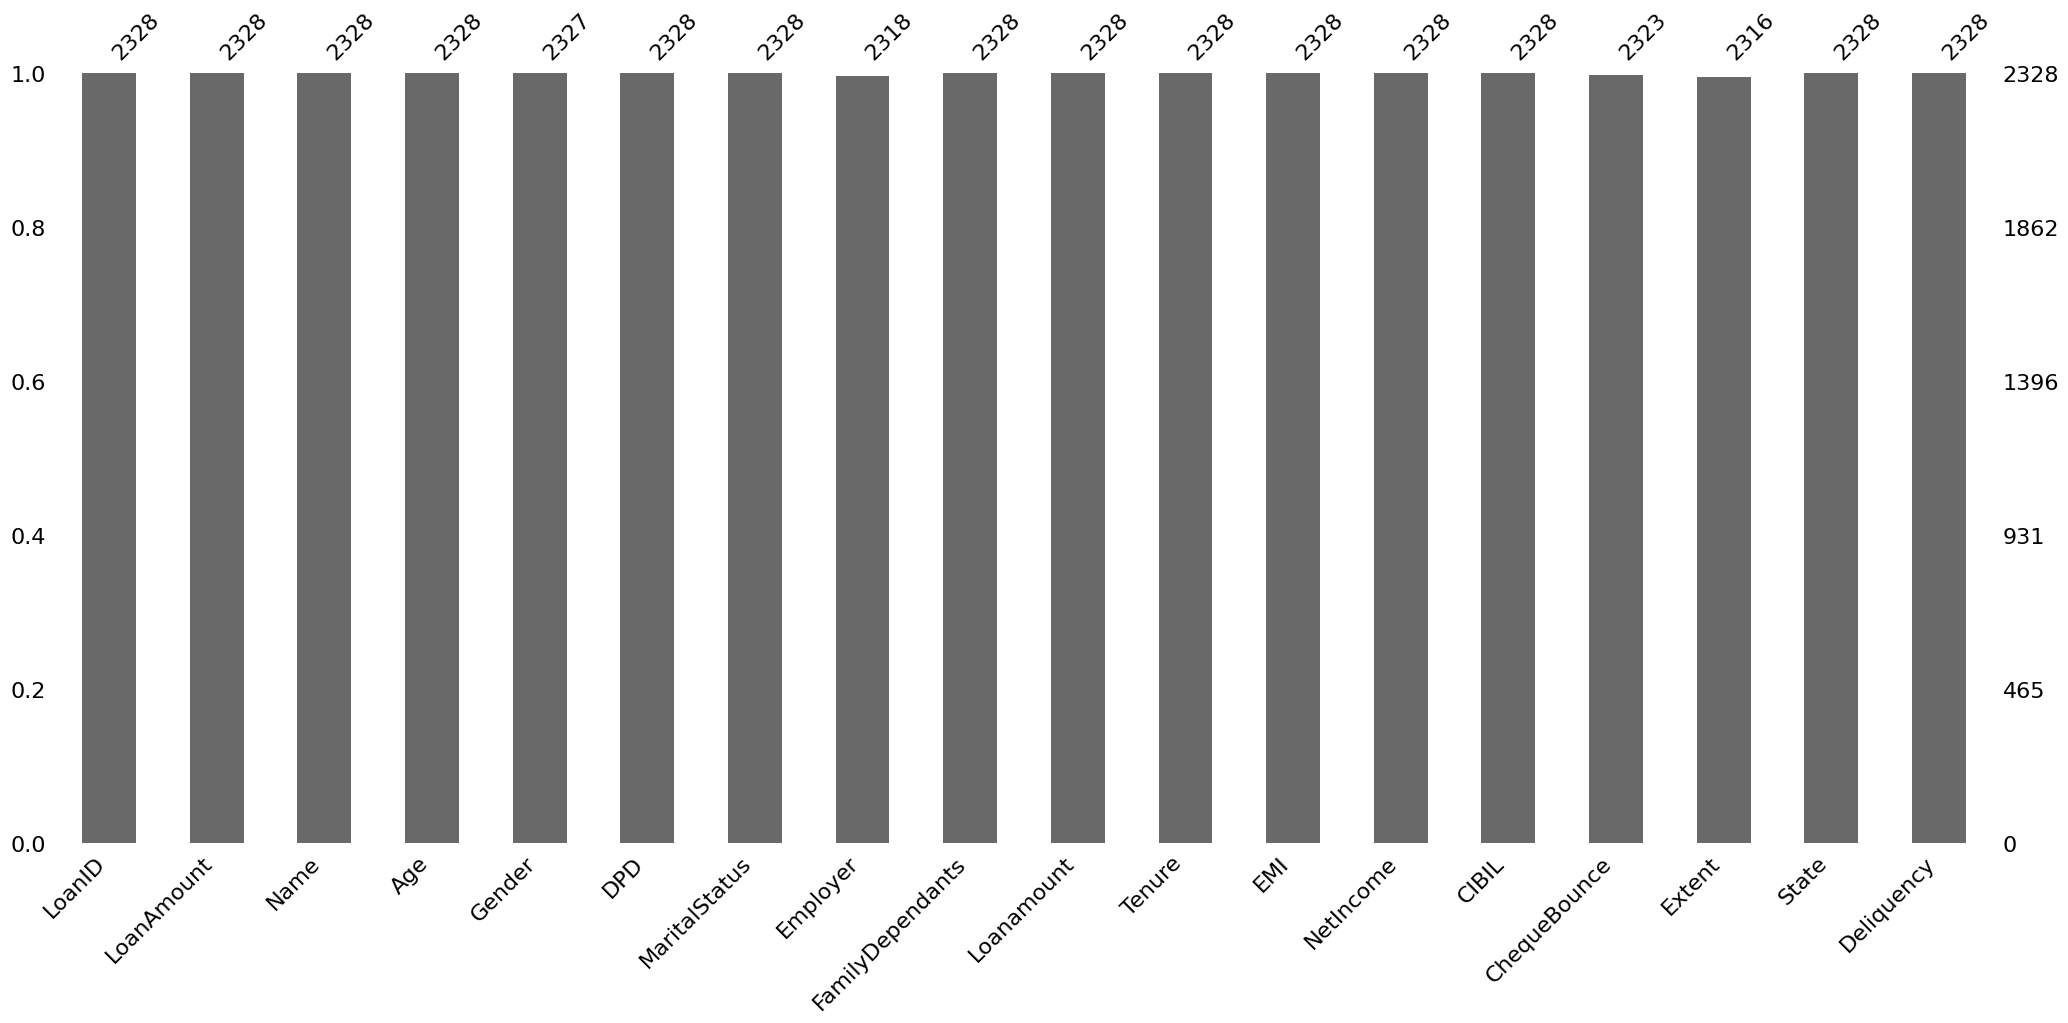

In [22]:
msno.bar(df)

<Axes: >

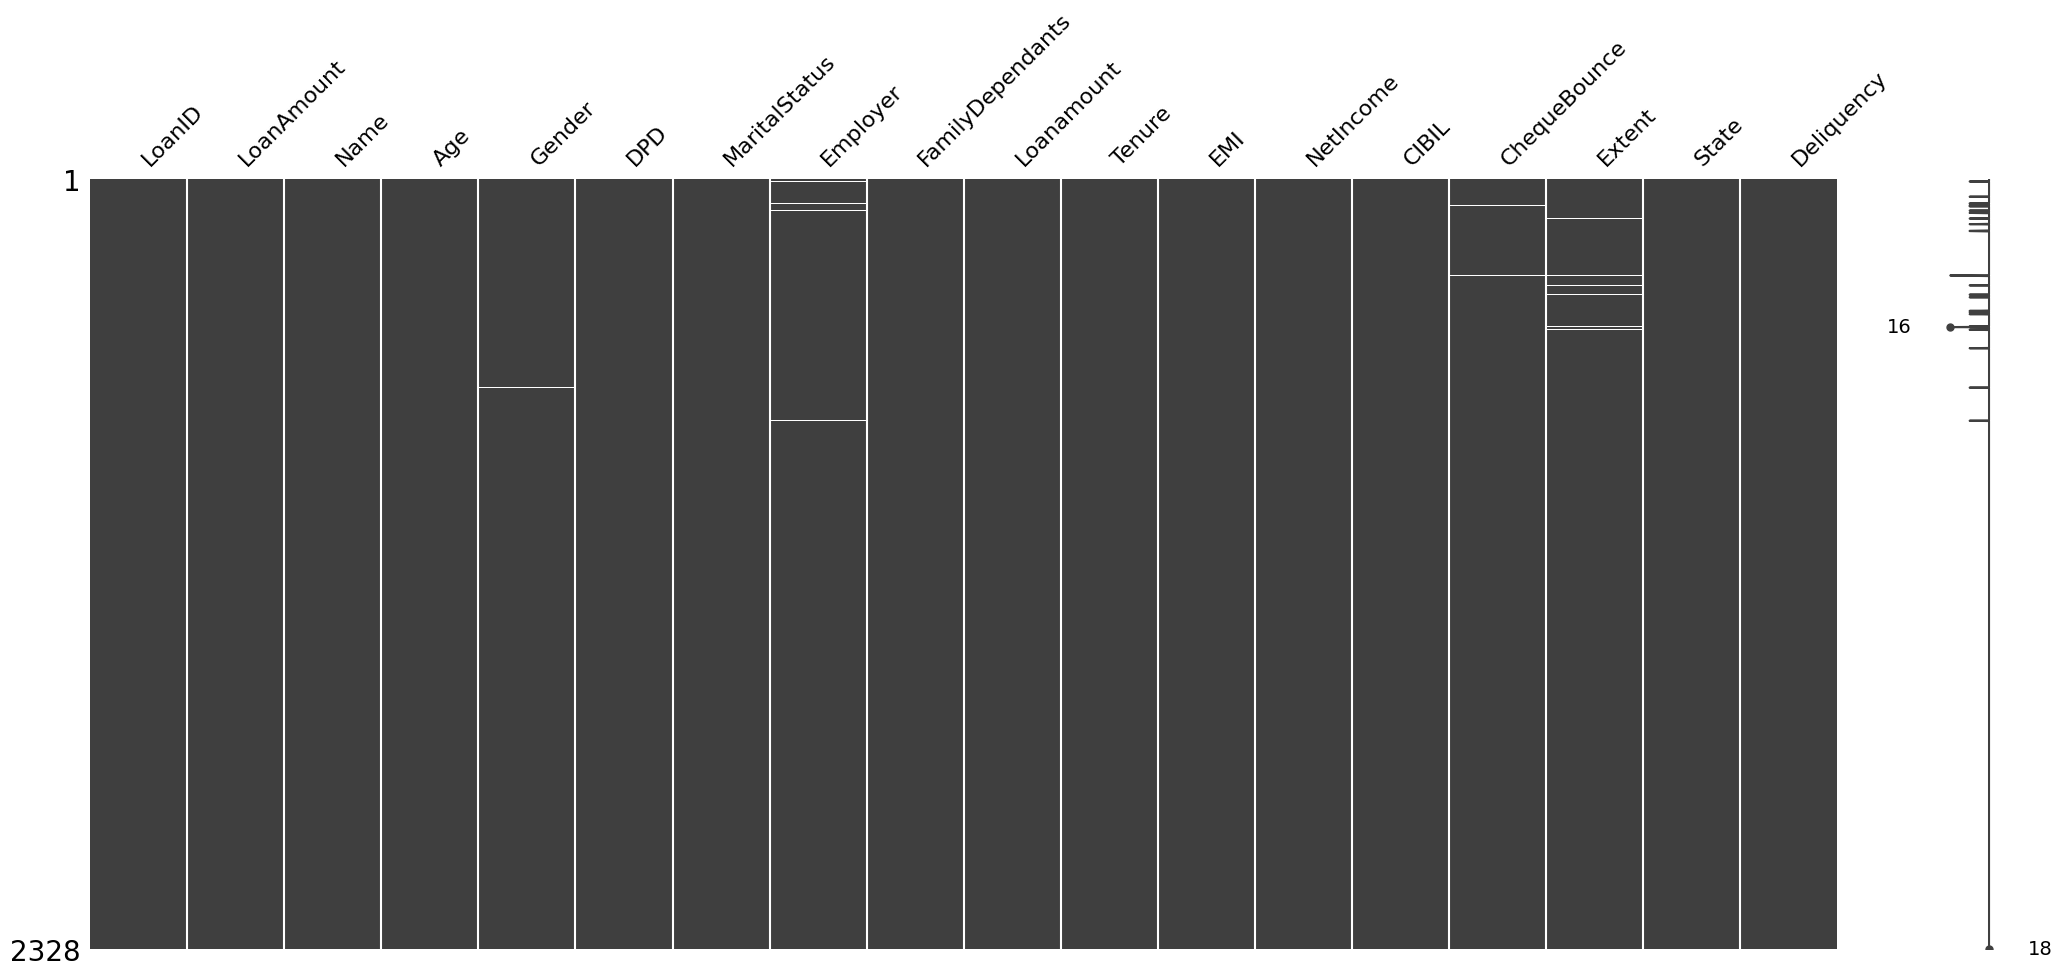

In [23]:
msno.matrix(df )

In [27]:
df['Extent'].fillna(df['Extent'].mode(), inplace=True) # Mode
df['Extent'].fillna(df['Extent'].mode(), inplace=True) # Mode



In [30]:
df.Deliquency = df.Deliquency.replace({"Yes": 1, "N0" : 0})
# loan_test.Loan_Status = loan_test.Loan_Status.replace({"Y": 1, "N" : 0})

df.Gender = df.Gender.replace({"Male": 1, "Female" : 0})
df.Gender = df.Gender.replace({"Male": 1, "Female" : 0})

df.Married = df.MaritalStatus.replace({"OTHERS": 2,"MARRIED": 1, "UNMARRIED" : 0})
df.Married = df.MaritalStatus.replace({"Yes": 1, "No" : 0})

df.ChequeBounce = df.ChequeBounce.replace({"Yes": 1, "No" : 0})
df.ChequeBounce = df.ChequeBounce.replace({"Yes": 1, "No" : 0})

In [ ]:
loan_train['Gender'].fillna(loan_train['Gender'].mode()[0], inplace=True)
loan_test['Gender'].fillna(loan_test['Gender'].mode()[0], inplace=True)

loan_train['Dependents'].fillna(loan_train['Dependents'].mode()[0], inplace=True)
loan_test['Dependents'].fillna(loan_test['Dependents'].mode()[0], inplace=True)

loan_train['Married'].fillna(loan_train['Married'].mode()[0], inplace=True)
loan_test['Married'].fillna(loan_test['Married'].mode()[0], inplace=True)

loan_train['Credit_History'].fillna(loan_train['Credit_History'].mean(), inplace=True)
loan_test['Credit_History'].fillna(loan_test['Credit_History'].mean(), inplace=True)